# Teddy Training DataSet Creation

The purpose of this notebook is to generate a dataset for use in a machine learning model for prediction of photometric redshifts. This ML model will be used in the Catalogue of Nearby Galaxies with Full Posteriors on their Photometric Redshifts (CNGFPPR).

In this notebook:

1) The TEDDY Dataset is downloaded
2) This data is cross-matched with PanSTARRS and 2MASS to get magnitude information on galaxies with spectroscopic redshifts (found in TEDDY).
3) The matched Data is cleaned.
4) The Data is downloaded for subsequent use

# Part 1
### Importing Modules

In [1]:
#import modules
import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import requests

import astroFuncs as af

import mastcasjobs


### Getting the required files
Info on the data: https://github.com/COINtoolbox/photoz_catalogues/blob/master/README.md

In [2]:
#use this cell to download the teddy files for use.

download_required_files = False #set to true if need to download them

download_path = "/home/richard/Work/placement_project/CNGFPPR/data/"

url_teddy_A = "https://github.com/COINtoolbox/photoz_catalogues/raw/master/Teddy/teddy_A"
url_teddy_B = "https://github.com/COINtoolbox/photoz_catalogues/raw/master/Teddy/teddy_B"
url_teddy_C = "https://github.com/COINtoolbox/photoz_catalogues/raw/master/Teddy/teddy_C"
url_teddy_D = "https://github.com/COINtoolbox/photoz_catalogues/raw/master/Teddy/teddy_D"


if download_required_files == True:
    #then download files

    with open(download_path+"teddy_A.txt" , 'wb') as file:
        file.write(requests.get(url_teddy_A).content)
        file.close()

    with open(download_path+"teddy_B.txt" , 'wb') as file:
        file.write(requests.get(url_teddy_B).content)
        file.close()

    with open(download_path+"teddy_C.txt" , 'wb') as file:
        file.write(requests.get(url_teddy_C).content)
        file.close()

    with open(download_path+"teddy_D.txt" , 'wb') as file:
        file.write(requests.get(url_teddy_D).content)
        file.close()

In [3]:
#read in downloads
teddy_A = pd.read_table(download_path+"teddy_A.txt", delim_whitespace=True, header=6)
teddy_B = pd.read_table(download_path+"teddy_B.txt", delim_whitespace=True, header=6)
teddy_C = pd.read_table(download_path+"teddy_C.txt", delim_whitespace=True, header=6)
teddy_D = pd.read_table(download_path+"teddy_D.txt", delim_whitespace=True, header=6)

### Initial Look at the Dataset

In [4]:
teddy_A

,#,id,mag_r,u-g,g-r,r-i,i-z,z_spec,feat1,feat2,feat3,feat4,feat5
0,1237645942905110768,18.914286,2.072901,1.386738,0.482288,0.272480,0.309728,-0.001069,0.205242,0.123685,-0.623802,-0.354959,NaN
1,1237645942905569773,19.394960,1.544794,1.557312,0.541681,0.418470,0.336479,0.283997,-0.262650,0.449938,-0.441687,0.242252,NaN
2,1237645943978328381,19.886253,1.028398,1.764324,0.672249,0.374681,0.406500,0.575361,-0.720166,0.845885,-0.041332,0.063122,NaN
3,1237645943978524819,17.561859,2.166397,1.304127,0.428728,0.303825,0.192485,-0.803132,0.288078,-0.034323,-0.788032,-0.226733,NaN
4,1237645943978524889,18.495819,1.359457,1.720991,0.521324,0.360054,0.319904,-0.249242,-0.426855,0.763003,-0.504107,0.003285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74304,1237680531354026438,17.905106,1.300573,1.518801,0.522589,0.404392,0.261464,-0.599567,-0.479025,0.376278,-0.500230,0.184661,NaN
74305,1237680531354878404,17.588964,1.442886,1.408772,0.542276,0.394083,0.223003,-0.787057,-0.352938,0.165828,-0.439862,0.142489,NaN
74306,1237680531355009174,20.376284,1.748831,1.362972,0.759176,0.427336,0.478527,0.865976,-0.081877,0.078229,0.225210,0.278518,NaN
74307,1237680531355795869,18.126299,1.480217,1.483189,0.573711,0.359980,0.274434,-0.468388,-0.319864,0.308164,-0.343474,0.002980,NaN


In [5]:
print("Length of Teddy B:",len(teddy_B))
print("Length of Teddy C:",len(teddy_C))
print("Length of Teddy D:",len(teddy_D))

Length of Teddy B: 74557
Length of Teddy C: 97980
Length of Teddy D: 75924


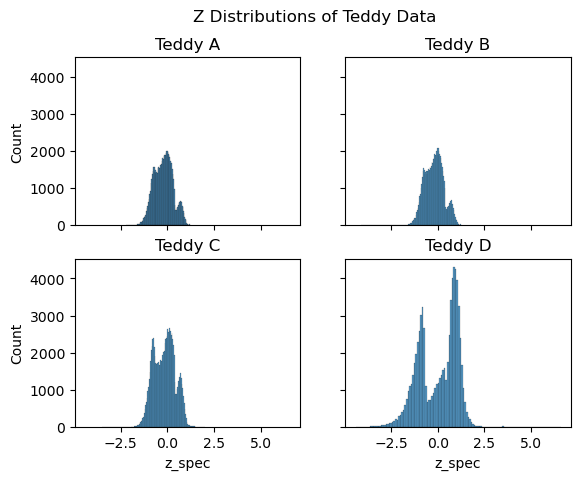

In [6]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)

sns.histplot(teddy_A.z_spec, ax=axs[0][0])
sns.histplot(teddy_B.z_spec, ax=axs[0][1])
sns.histplot(teddy_C.z_spec, ax=axs[1][0])
sns.histplot(teddy_D.z_spec, ax=axs[1][1])

fig.suptitle("Z Distributions of Teddy Data")
axs[0][0].set_title(label="Teddy A")
axs[0][1].set_title(label="Teddy B")
axs[1][0].set_title(label="Teddy C")
axs[1][1].set_title(label="Teddy D")

plt.show()

### About the Teddy Dataset...

This dataset contains the SDSS data and the same data processed for machine learning labelled feat 1-5 which can be used for training on the SDSS data, however the CNGFPPR ML Model will be trained on alternative data from PS1/2MASS.

#### Why Teddy?
The Teddy Dataset was chosen as it was a readily available set of detections with redshift information.
#### What is the model being trained on?
Since the Teddy Dataset contains SDSS IDs we can query Mast Casjobs for the ra and declination of SDSS detections, and then using the cross-match function find the relevant info for each detection from the PS1 database, and 2MASS. Models can then be trained on this data and tested. Useful features can be selected after this.

#### Note:
This dataset was intended for as a method of testing Machine Learning models for spectroscopic redshift prediction, and may not necessarily represent the quality of data found when in production to complete accuracy. Using PanSTARRS data may make this dataset more representative for training models for real-world use but keeping this in mind it may be a good idea to train an alternative model using a dedicated dataset which is more representative down the line. However steps are also taken to avoid this issue such as under-sampling.

# Part 2
### Making Our Dataset

In [7]:
#add the ABCD datasets together and export to CSV for crossmatching in SDSS CasJobs
#adding together
teddy_All = pd.concat([teddy_A, teddy_B, teddy_C, teddy_D]).reset_index(drop=True)

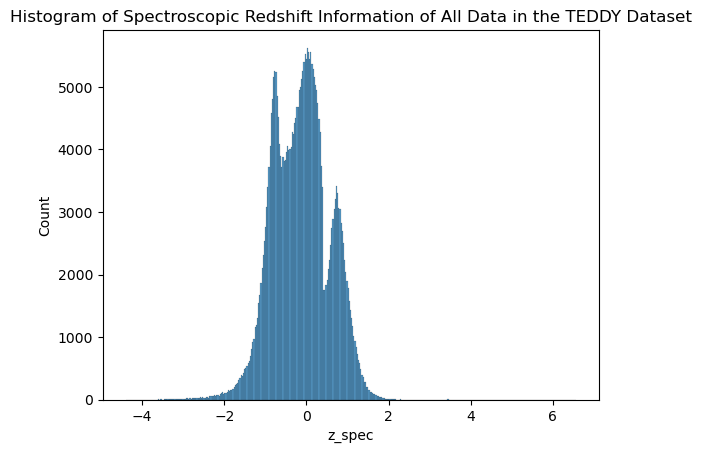

In [8]:
sns.histplot(teddy_All.z_spec)
plt.title("Histogram of Spectroscopic Redshift Information of All Data in the TEDDY Dataset")
plt.show()

In [9]:
#the normalised features are not needed, and can drop colour data
spec_id_list = teddy_All.loc[:, ["id","z_spec"]]

In [10]:
#save as csv, then can be used to get sdss ra and dec
spec_id_list.to_csv(download_path+"spec_id_list.csv", header = ["SDSSid","zSpec",], index=False)

The Following SQL Queries were run in the SDSS Casjobs Server under context DR12.

Casjobs Found Here: https://skyserver.sdss.org/casjobs/

The spec_id_list was uploaded to mydb as "specObjId". 

Go to Login > Query and paste the query in the next cell.

This query creates a table called "teddyAll" which contains SDSS features, ra, dec, etc. as seen below in the query.

"teddyAll" was then downloaded.

Load in the SDSS Data, this has the Ra and Dec which can be used to crossmatch with PS1/2MASS

In [11]:
teddyAll = pd.read_csv("/home/richard/Work/placement_project/CNGFPPR/data/teddyAll_richardon.csv")

In [12]:
teddyAll

,SDSSID,SDSSRa,SDSSDec,z,zErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,SDSS_uMagErr,SDSS_gMagErr,SDSS_rMagErr,SDSS_iMagErr,SDSS_zMagErr
0,1237645879577739681,49.873779,1.271194,0.293778,0.000078,23.00731,21.34087,19.74872,19.14171,18.80783,0.663544,0.065260,0.026834,0.026258,0.072476
1,1237645942904520927,54.936769,0.216784,0.201237,0.000050,21.30060,19.02486,17.60062,17.04626,16.69721,0.180828,0.014182,0.007199,0.006362,0.015341
2,1237645942904520927,54.936769,0.216784,0.201265,0.000040,21.30060,19.02486,17.60062,17.04626,16.69721,0.180828,0.014182,0.007199,0.006362,0.015341
3,1237645942904520927,54.936769,0.216784,0.201328,0.000043,21.30060,19.02486,17.60062,17.04626,16.69721,0.180828,0.014182,0.007199,0.006362,0.015341
4,1237645942904520927,54.936769,0.216784,0.201277,0.000036,21.30060,19.02486,17.60062,17.04626,16.69721,0.180828,0.014182,0.007199,0.006362,0.015341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348266,1237680531356123560,357.042770,31.006018,0.343875,0.000069,22.92570,21.07577,19.29146,18.58348,18.23000,0.614295,0.045774,0.018224,0.015938,0.038389
348267,1237680531356189084,357.218970,30.829394,0.282889,0.000045,21.55507,20.46294,18.80922,18.19742,17.77137,0.222421,0.030809,0.014009,0.012882,0.028919
348268,1237680531356189119,357.282550,30.873288,0.291777,0.000059,21.67406,19.72215,18.15322,17.48516,17.01184,0.469512,0.029332,0.013732,0.012472,0.028692
348269,1237680531356254710,357.307100,30.855049,0.296219,0.000047,20.92714,19.30970,17.72287,17.11054,16.68986,0.246650,0.021528,0.010166,0.009557,0.022115


Now we have the RA and Dec of the data in Teddy. Next is the retrieval of PS1 and 2MASS data. This can be done using the mastcasjobs python module.

For additional context, notebook Guide to using the mascasjobs module: https://ps1images.stsci.edu/ps1_dr2_query.html

There are some convenience functions in the astrofuncs.py file which will be used. But first the teddyAll data must be imported to mydb on the mast casjobs website under the import section.

The teddyAll data was imported with the name "teddyAll" into the Mastcasjobs mydb.

In [13]:
#this lets us sign in and access the PS1 casjhobs, an account is required
af.mastcasjobs_init()

Enter Casjobs username: richardon
Enter Casjobs password: ········


The below query uses the built in function "fGetNearestObjEq". This returns the nearest detection within a limit of radius 0.036 degrees. The search is based off ra and dec between the SDSS and PS1 detections. After this the required information is also retrieved and put into a table. Additionally the angular separation of matches is returned.

#### Cross-Matching with PS1 Data

In [14]:
#set the context for the query
job = mastcasjobs.MastCasJobs(context="PanSTARRS_DR2")
#table's eventual name
table_name = "teddySDSS_PS1"
#name of query this can be used to identify in casjobs history/queue
query_name = "sdss_PS1_crossmatching"

#the query itself in SQL
query = """
SELECT
    t.SDSSID, t.SDSSRa, t.SDSSDec, t.z, t.ZErr, t.SDSS_uMag, t.SDSS_gMag, t.SDSS_rMag, t.SDSS_iMag, t.SDSS_zMag, t.SDSS_uMagErr, t.SDSS_gMagErr, t.SDSS_rMagErr, t.SDSS_iMagErr, t.SDSS_zMagErr,
    n.objID as PS1ID, n.distance AS PS1AngSep,
    o.raStack as PS1Ra, o.decStack as PS1Dec,
    s.gKronMag, s.rKronMag, s.iKronMag, s.zKronMag, s.yKronMag, s.gKronMagErr, s.rKronMagErr, s.iKronMagErr, s.zKronMagErr, s.yKronMagErr
FROM mydb.teddySDSS as t
    CROSS APPLY fGetNearestObjEq( t.SDSSra, t.SDSSdec, 0.036) as n
    JOIN StackObjectThin as s ON n.objID=s.objID
    JOIN ObjectThin AS o ON n.objID=o.objID
INTO teddySDSS_PS1
        """


"""
*** This is not the query, just an example to help understand ***
To summarize:
SELECT
    These Features
FROM the_teddy_dataset_we_uploaded
    CROSS APPLY NearestObjFunction(using,features,selected)
    JOIN information_from_this_table
    JOIN information_from_this_other_table
INTO new_table
"""

#need to check if this table already exists, if so retrieve it for use here
if table_name in job.list_tables():
    teddySDSS_PS1 = job.fast_table(table_name).to_pandas()
else: #if not, run the search and save the table for later use
    job_id = job.submit(query, task_name=query_name)
    job.monitor(job_id)
    teddySDSS_PS1 = job.fast_table(table_name).to_pandas()
    

teddySDSS_PS1 is the cross-matched dataframe of the SDSS and PS1 detections. We have retrieved magnitude data, errors and the spectroscopic redshift.

In [15]:
teddySDSS_PS1

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,gKronMag,rKronMag,iKronMag,zKronMag,yKronMag,gKronMagErr,rKronMagErr,iKronMagErr,zKronMagErr,yKronMagErr
0,1237645943978852803,56.164891,0.868829,0.397707,0.000193,23.14327,21.39636,19.44982,18.75803,18.31463,...,21.670000,19.553900,18.919001,18.558500,18.420700,0.084393,0.017417,0.011901,0.017594,0.026145
1,1237648674510864998,195.282390,0.224611,0.377616,0.000120,23.83985,21.75743,20.16556,19.39845,18.90345,...,21.959101,20.109400,19.543900,19.193300,19.243700,0.086360,0.023924,0.015628,0.025567,0.039044
2,1237648674511126636,195.860180,0.225227,0.208950,0.000038,22.84669,21.34524,20.06569,19.42400,19.10930,...,20.538700,19.407801,19.014799,18.713600,18.761400,0.029870,0.014859,0.011159,0.016917,0.029627
3,1237648674511454467,196.658540,0.242351,0.344443,0.000056,22.60668,20.50207,18.82018,18.18085,17.78073,...,20.579700,18.947800,18.323700,18.027100,17.912800,0.026568,0.010272,0.007046,0.009989,0.020822
4,1237648674511585680,196.904140,0.286692,0.501270,0.000120,23.46343,22.38363,20.55222,19.60692,19.20620,...,22.804100,20.585100,19.715401,19.299200,19.108801,0.151972,0.039253,0.017751,0.026501,0.036539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411782,1237680531356189084,357.218970,30.829394,0.282889,0.000045,21.55507,20.46294,18.80922,18.19742,17.77137,...,20.208401,18.962500,18.337999,18.108700,17.902100,0.028204,0.010801,0.006997,0.011905,0.018745
411783,1237680531356189119,357.282550,30.873288,0.291777,0.000059,21.67406,19.72215,18.15322,17.48516,17.01184,...,20.134701,18.592199,18.000900,17.739500,17.538799,0.029728,0.010130,0.008651,0.012138,0.015684
411784,1237680531356254710,357.307100,30.855049,0.296219,0.000047,20.92714,19.30970,17.72287,17.11054,16.68986,...,19.577900,17.841600,17.312401,17.117599,17.067301,0.025799,0.006617,0.006514,0.008902,0.019618
411785,1237680531356254710,357.307100,30.855049,0.296219,0.000047,20.92714,19.30970,17.72287,17.11054,16.68986,...,19.598200,17.829800,17.291800,17.088499,17.032301,0.025362,0.006739,0.006582,0.008858,0.018550


Now the PS1 Data has been matched to the SDSS Data based on Location. Next is to match with 2MASS. The Point source catalogue (PSC) and Extended source catalogue (XSC) are both cross-matched into tables.

Similar to above the 2MASS features are added to a table with the PS1 and SDSS info.

The 2MASS Crossmatching must be ran separately for PSC and XSC to also retrieve their errors.

Cross-Matching with 2MASS Point Source Catalogue (PSC)


In [16]:
# Point Source Catalogue Crossmatching

job = mastcasjobs.MastCasJobs(context="TwoMassNew")

table_name = "teddySDSS_PS1_2mPSC"

query_name = "sdss_PS1_PSC_crossmatching"

query = """
SELECT
    t.SDSSID, t.SDSSRa, t.SDSSDec, t.z, t.ZErr, t.SDSS_uMag, t.SDSS_gMag, t.SDSS_rMag, t.SDSS_iMag, t.SDSS_zMag, t.SDSS_uMagErr, t.SDSS_gMagErr, t.SDSS_rMagErr, t.SDSS_iMagErr, t.SDSS_zMagErr,
    t.PS1ID, t.PS1AngSep, t.PS1Ra, t.PS1Dec, t.gKronMag, t.rKronMag, t.iKronMag, t.zKronMag, t.yKronMag, t.gKronMagErr, t.rKronMagErr, t.iKronMagErr, t.zKronMagErr, t.yKronMagErr,
    n.objID as TMassID, n.distance as TMassAngSep,
    p.ra as TMassRa, p.decl as TMassDec, p.j_m, p.h_m, p.k_m, p.j_msigcom as j_err, p.h_msigcom as h_err, p.k_msigcom as k_err
FROM mydb.teddySDSS_PS1 as t
    CROSS APPLY fGetNearbyObjEq( t.SDSSra, t.SDSSdec, 0.036) as n
    JOIN twomass_psc as p ON n.objID=p.objID
INTO teddySDSS_PS1_2mPSC
        """

if table_name in job.list_tables():
    teddySDSS_PS1_2mPSC = job.fast_table(table_name).to_pandas()
else:
    job_id = job.submit(query, task_name=query_name)
    job.monitor(job_id)
    teddySDSS_PS1_2mPSC = job.fast_table(table_name).to_pandas()
    

In [17]:
teddySDSS_PS1_2mPSC

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,TMassID,TMassAngSep,TMassRa,TMassDec,j_m,h_m,k_m,j_err,h_err,k_err
0,1237678881561378967,8.936801,-1.702955,0.305816,0.000041,21.74274,19.59730,18.09268,17.54002,17.16918,...,67587863,0.004768,8.936876,-1.702981,16.341000,15.654,14.878,0.103,0.136,0.125
1,1237679436132974724,8.913691,-1.627117,0.305564,0.000048,21.64296,20.07181,18.43474,17.83649,17.43632,...,67587993,0.001971,8.913716,-1.627138,16.645000,15.678,15.063,0.136,0.125,0.130
2,1237663782590677299,8.956745,-1.240439,0.266355,0.000031,20.82288,18.79835,17.51130,16.94736,16.58223,...,67588560,0.006554,8.956854,-1.240447,16.455000,15.828,14.847,0.117,0.130,0.128
3,1237663782590677299,8.956787,-1.240426,0.266539,0.000067,20.82288,18.79835,17.51130,16.94736,16.58223,...,67588560,0.004212,8.956854,-1.240447,16.455000,15.828,14.847,0.117,0.130,0.128
4,1237663783664419063,8.870802,-0.380672,0.281411,0.000090,21.93136,19.80225,18.26339,17.71931,17.34760,...,67589904,0.001305,8.870808,-0.380693,16.919001,16.041,15.258,0.166,0.163,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214450,1237665537075445909,233.624130,23.618370,0.194171,0.000035,21.28900,19.11567,17.80675,17.25685,16.90898,...,1339162808,0.000657,233.624120,23.618364,15.962000,15.234,14.681,0.081,0.079,0.095
214451,1237665537075445909,233.624130,23.618370,0.194171,0.000035,21.28900,19.11567,17.80675,17.25685,16.90898,...,1339162808,0.000657,233.624120,23.618364,15.962000,15.234,14.681,0.081,0.079,0.095
214452,1237662500014850255,256.012100,23.087128,0.326540,0.000074,22.20014,19.96835,18.29382,17.63261,17.26276,...,1339165124,0.007731,256.012240,23.087124,16.782000,15.717,15.176,0.131,0.135,0.146
214453,1237662301916234225,255.992380,22.705800,0.198419,0.000024,20.15726,18.51050,17.22348,16.72171,16.34510,...,1339165887,0.003924,255.992420,22.705854,15.820000,15.040,14.503,0.082,0.082,0.101


In [18]:
# Extended Source Catalogue Crossmatching

job = mastcasjobs.MastCasJobs(context="TwoMassNew")

table_name = "teddySDSS_PS1_2mXSC"

query_name = "sdss_PS1_PSC_XSC_crossmatching"

query = """
SELECT
    t.SDSSID, t.SDSSRa, t.SDSSDec, t.z, t.ZErr, t.SDSS_uMag, t.SDSS_gMag, t.SDSS_rMag, t.SDSS_iMag, t.SDSS_zMag, t.SDSS_uMagErr, t.SDSS_gMagErr, t.SDSS_rMagErr, t.SDSS_iMagErr, t.SDSS_zMagErr,
    t.PS1ID, t.PS1AngSep, t.PS1Ra, t.PS1Dec, t.gKronMag, t.rKronMag, t.iKronMag, t.zKronMag, t.yKronMag, t.gKronMagErr, t.rKronMagErr, t.iKronMagErr, t.zKronMagErr, t.yKronMagErr,
    n.objID as TMassID, n.distance as TMassAngSep,
    x.ra as TMassRa, x.decl as TMassDec, x.j_m_k20fe as j_fm, x.h_m_k20fe as h_fm, x.k_m_k20fe as k_fm, x.j_msig_k20fe as j_fmErr, x.h_msig_k20fe as h_fmErr, x.k_msig_k20fe as k_fmErr
FROM mydb.teddySDSS_PS1 as t
    CROSS APPLY fGetNearbyObjEq( t.SDSSra, t.SDSSdec, 0.036) as n
    JOIN twomass_xsc as x ON n.objID=x.objID
INTO teddySDSS_PS1_2mXSC
        """

if table_name in job.list_tables():
    teddySDSS_PS1_2mXSC = job.fast_table(table_name).to_pandas()
else:
    job_id = job.submit(query, task_name=query_name)
    job.monitor(job_id)
    teddySDSS_PS1_2mXSC = job.fast_table(table_name).to_pandas()

In [19]:
teddySDSS_PS1_2mXSC

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,TMassID,TMassAngSep,TMassRa,TMassDec,j_fm,h_fm,k_fm,j_fmErr,h_fmErr,k_fmErr
0,1237645942905897218,58.023167,0.048083,0.081735,0.000028,20.39358,18.49890,17.33283,16.70162,16.20181,...,3001246455,0.011258,58.023319,0.047973,15.159,14.493,13.976,0.098,0.125,0.134
1,1237648702980751499,215.995770,-1.075115,0.176932,0.000031,20.27797,18.22666,16.98548,16.46809,16.10068,...,3000570012,0.006510,215.995712,-1.075023,15.133,14.268,13.876,0.098,0.099,0.115
2,1237648702980751499,215.995770,-1.075115,0.176932,0.000031,20.27797,18.22666,16.98548,16.46809,16.10068,...,3000570012,0.006510,215.995712,-1.075023,15.133,14.268,13.876,0.098,0.099,0.115
3,1237645943978983547,56.494047,0.930398,0.181200,0.000024,20.83027,18.85596,17.49530,16.94309,16.54061,...,3000917707,0.005662,56.494141,0.930390,15.426,14.502,13.953,0.147,0.137,0.157
4,1237645943978983547,56.494071,0.930342,0.181227,0.000037,20.83027,18.85596,17.49530,16.94309,16.54061,...,3000917707,0.005087,56.494141,0.930390,15.426,14.502,13.953,0.147,0.137,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61629,1237680531353633290,350.465320,30.356692,0.236888,0.000037,20.84923,19.31395,17.87200,17.25512,16.85688,...,3000556028,0.005421,350.465302,30.356781,15.821,NaN,14.368,0.145,NaN,0.189
61630,1237680531354878300,353.715110,30.661806,0.188253,0.000024,21.17701,18.87334,17.53175,17.00184,16.57464,...,3000666291,0.009156,353.714935,30.661831,15.500,14.819,14.203,0.118,0.152,0.165
61631,1237680531354878404,353.668360,30.666179,0.223003,0.000031,20.93078,19.35839,17.85054,17.24503,16.79323,...,3000672265,0.007079,353.668335,30.666063,15.773,14.788,14.111,0.147,0.143,0.147
61632,1237680531356254710,357.307100,30.855049,0.296219,0.000047,20.92714,19.30970,17.72287,17.11054,16.68986,...,3000863322,0.014192,357.307373,30.855017,15.675,NaN,13.911,0.190,NaN,0.153


In [20]:
#renaming so can merge to the psc based on sdss id
teddySDSS_PS1_2mXSC = teddySDSS_PS1_2mXSC.rename(columns={"j_fm":"j_m","h_fm":"h_m","k_fm":"k_m",
                                                          "j_fmErr":"j_err","h_fmErr":"h_err",
                                                          "k_fmErr":"k_err"})

In [21]:
teddySDSS_PS1_2M = pd.concat([teddySDSS_PS1_2mXSC, teddySDSS_PS1_2mPSC])

#### Making a PS1 + 2MASS Catalogue Containing All PS1 Detections and 2MASS Detections

In [22]:
teddySDSS_PS1_2M.TMassID

0         3001246455
1         3000570012
2         3000570012
3         3000917707
4         3000917707
             ...    
214450    1339162808
214451    1339162808
214452    1339165124
214453    1339165887
214454    1339167967
Name: TMassID, Length: 276089, dtype: int64

In [23]:
# PS1IDs = teddySDSS_PS1_2M.PS1ID

# PS1_dets_not_in_2M = teddySDSS_PS1.drop(
#     teddySDSS_PS1[teddySDSS_PS1.PS1ID.isin(PS1IDs)].index,
#     axis = 0)

# #converting this column to str to prevent conversion of ids to float values
# teddySDSS_PS1_2M["TMASSID"] = teddySDSS_PS1_2M.TMassID.astype(str)

# teddySDSS_AllPS1_2M = pd.concat([teddySDSS_PS1_2M, PS1_dets_not_in_2M]).reset_index(drop=True)

# teddySDSS_AllPS1_2M.head()

# Part 3
### Cleaning the Matched Catalogues
#### PS1

In [24]:
len(teddySDSS_PS1)

411787

Checking Duplicates

In [25]:
print(teddySDSS_PS1.duplicated(subset="PS1ID", keep="first").value_counts())
print(teddySDSS_PS1.duplicated(subset="SDSSID", keep="first").value_counts())


False    314332
True      97455
dtype: int64
False    314325
True      97462
dtype: int64


Getting rid of duplicates this way keeps the duplicate value with a smaller angular separation.

In [26]:
teddySDSS_PS1 = teddySDSS_PS1.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="PS1ID", keep="first", ignore_index=True)

teddySDSS_PS1 = teddySDSS_PS1.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="SDSSID", keep="first", ignore_index=True)

Checking Value Counts Again

In [27]:
len(teddySDSS_PS1)

314325

In [28]:
print(teddySDSS_PS1.duplicated(subset="PS1ID", keep="first").value_counts())
print(teddySDSS_PS1.duplicated(subset="SDSSID", keep="first").value_counts())


False    314325
dtype: int64
False    314325
dtype: int64


#### 2MASS

In [29]:
len(teddySDSS_PS1_2M)

276089

In [30]:
#converting from Vega to A/B Mags
teddySDSS_PS1_2M["j_m"] = teddySDSS_PS1_2M["j_m"]+0.91
teddySDSS_PS1_2M["h_m"] = teddySDSS_PS1_2M["h_m"]+1.39
teddySDSS_PS1_2M["k_m"] = teddySDSS_PS1_2M["k_m"]+1.85

In [31]:
print(teddySDSS_PS1_2M.duplicated(subset="TMassID", keep="first").value_counts())
print("\n")
print(teddySDSS_PS1_2M.duplicated(subset="PS1ID", keep="first").value_counts())
print("\n")
print(teddySDSS_PS1_2M.duplicated(subset="SDSSID", keep="first").value_counts())

False    210733
True      65356
dtype: int64


False    163474
True     112615
dtype: int64


False    163472
True     112617
dtype: int64


In [32]:
teddySDSS_PS1_2M = teddySDSS_PS1_2M.sort_values(by = "TMassAngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="TMassID", keep="first", ignore_index=True)

teddySDSS_PS1_2M = teddySDSS_PS1_2M.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="PS1ID", keep="first", ignore_index=True)

teddySDSS_PS1_2M = teddySDSS_PS1_2M.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="SDSSID", keep="first", ignore_index=True)

In [33]:
print(teddySDSS_PS1_2M.duplicated(subset="TMassID", keep="first").value_counts())
print("\n")
print(teddySDSS_PS1_2M.duplicated(subset="PS1ID", keep="first").value_counts())
print("\n")
print(teddySDSS_PS1_2M.duplicated(subset="SDSSID", keep="first").value_counts())


False    163469
dtype: int64


False    163469
dtype: int64


False    163469
dtype: int64


#### 2MASS and All PS1 Detections

In [34]:
PS1IDs = teddySDSS_PS1_2M.PS1ID

PS1_dets_not_in_2M = teddySDSS_PS1.drop(
    teddySDSS_PS1[teddySDSS_PS1.PS1ID.isin(PS1IDs)].index,
    axis = 0)

#converting this column to str to prevent conversion of ids to float values
teddySDSS_PS1_2M["TMASSID"] = teddySDSS_PS1_2M.TMassID.astype(str)

teddySDSS_AllPS1_2M = pd.concat([teddySDSS_PS1_2M, PS1_dets_not_in_2M]).reset_index(drop=True)

teddySDSS_AllPS1_2M.head()


,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,TMassAngSep,TMassRa,TMassDec,j_m,h_m,k_m,j_err,h_err,k_err,TMASSID
0,1237657118941577636,117.277250,29.305172,0.102362,0.000030,20.32887,18.52176,17.60047,17.18418,16.86134,...,0.002406,117.277284,29.305199,16.873000,16.774,17.124,0.077,0.094,0.162,356631873
1,1237661948655239429,211.272440,10.315721,0.264092,0.000052,20.69785,18.86280,17.34143,16.78700,16.45400,...,0.005521,211.272377,10.315653,16.896000,16.727,16.403,0.090,0.113,0.116,976770733
2,1237666273661223281,11.693089,23.767029,0.252819,0.000038,21.38727,19.30797,17.74030,17.18118,16.83034,...,0.003024,11.693140,23.767010,17.143000,17.074,16.574,0.118,0.137,0.134,1282553713
3,1237662238022238510,228.726970,7.551574,0.177385,0.000033,20.84908,19.08652,17.84929,17.27679,16.85562,...,0.002762,228.726956,7.551618,17.326000,17.060,16.907,0.122,0.161,0.169,1034093383
4,1237669763874029810,343.006860,7.897519,0.513429,0.000063,23.01907,21.00147,19.30635,18.56060,18.17683,...,0.007305,343.006767,7.897599,18.235001,17.316,17.646,0.273,0.193,0.274,1000677531


In [35]:
len(teddySDSS_AllPS1_2M)

314327

In [36]:
teddySDSS_AllPS1_2M.TMassID.isna().sum()

150858

In [37]:
print(teddySDSS_AllPS1_2M.duplicated(subset="TMassID", keep="first").value_counts())
print("\n")
print(teddySDSS_AllPS1_2M.duplicated(subset="PS1ID", keep="first").value_counts())
print("\n")
print(teddySDSS_AllPS1_2M.duplicated(subset="SDSSID", keep="first").value_counts())


False    163470
True     150857
dtype: int64


False    314327
dtype: int64


False    314325
True          2
dtype: int64


In [38]:
# teddySDSS_AllPS1_2M = teddySDSS_AllPS1_2M.sort_values(by = "TMassAngSep", ascending=True,
#                                                   kind="stable").drop_duplicates(
#     subset="TMassID", keep="first", ignore_index=True)

teddySDSS_AllPS1_2M = teddySDSS_AllPS1_2M.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="PS1ID", keep="first", ignore_index=True)

teddySDSS_AllPS1_2M = teddySDSS_AllPS1_2M.sort_values(by = "PS1AngSep", ascending=True,
                                                  kind="stable").drop_duplicates(
    subset="SDSSID", keep="first", ignore_index=True)

In [39]:
print(teddySDSS_AllPS1_2M.duplicated(subset="TMassID", keep="first").value_counts())
print("These are Nan Values \n")
print(teddySDSS_AllPS1_2M.duplicated(subset="PS1ID", keep="first").value_counts())
print("\n")
print(teddySDSS_AllPS1_2M.duplicated(subset="SDSSID", keep="first").value_counts())


False    163468
True     150857
dtype: int64
These are Nan Values 

False    314325
dtype: int64


False    314325
dtype: int64


### Now the Datasets are Ready

In [40]:
teddySDSS_PS1

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,gKronMag,rKronMag,iKronMag,zKronMag,yKronMag,gKronMagErr,rKronMagErr,iKronMagErr,zKronMagErr,yKronMagErr
0,1237662266470237911,243.270350,2.994859,0.663874,0.000198,25.56275,22.83073,21.16518,19.93503,19.63537,...,-999.000000,21.502199,20.258101,19.946899,19.519699,-999.000000,0.062200,0.020376,0.035837,0.060337
1,1237657118941577636,117.277250,29.305172,0.102362,0.000030,20.32887,18.52176,17.60047,17.18418,16.86134,...,18.509600,17.650900,17.257200,17.061800,16.819300,0.006728,0.003465,0.003574,0.007910,0.010302
2,1237661948655239429,211.272440,10.315721,0.264092,0.000052,20.69785,18.86280,17.34143,16.78700,16.45400,...,19.021200,17.459499,16.979300,16.743200,16.479900,0.017387,0.004655,0.004189,0.006366,0.010334
3,1237666273661223281,11.693089,23.767029,0.252819,0.000038,21.38727,19.30797,17.74030,17.18118,16.83034,...,19.233200,17.763000,17.108700,16.880800,16.839199,0.015174,0.005210,0.005996,0.008215,0.012441
4,1237662194523767536,176.462600,42.065285,0.563699,0.000125,25.57828,22.87555,20.86299,19.83455,19.18073,...,22.689400,20.925501,19.993601,19.594999,19.463200,0.172363,0.042185,0.020139,0.036004,0.074462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314320,1237680530276221391,341.056300,28.193643,0.153329,0.000041,23.41499,22.85378,20.91858,19.91021,19.70342,...,18.975800,18.475300,17.928499,17.694700,17.518299,0.011486,0.008345,0.006478,0.011773,0.019481
314321,1237678617420104410,5.250210,1.258280,0.404736,0.000058,22.13469,21.05278,19.77937,19.28931,18.89218,...,20.953199,19.806499,19.384600,19.120100,18.896500,0.043040,0.015229,0.014752,0.025634,0.034638
314322,1237663479792664912,326.464230,0.514423,0.300415,0.000028,22.98600,21.38283,19.98292,19.15430,18.69812,...,18.554100,17.944700,17.695299,17.589199,17.521299,0.004445,0.002921,0.002143,0.005473,0.013826
314323,1237680331095409047,339.872290,26.425648,0.070198,0.000007,20.06830,20.69494,20.22596,19.08978,19.99387,...,17.582300,16.980700,16.586201,16.414900,16.212200,0.004861,0.002863,0.003190,0.005873,0.010538


SDSSID          0
SDSSRa          0
SDSSDec         0
z               0
ZErr            0
SDSS_uMag       0
SDSS_gMag       0
SDSS_rMag       0
SDSS_iMag       0
SDSS_zMag       0
SDSS_uMagErr    0
SDSS_gMagErr    0
SDSS_rMagErr    0
SDSS_iMagErr    0
SDSS_zMagErr    0
PS1ID           0
PS1AngSep       0
PS1Ra           0
PS1Dec          0
gKronMag        0
rKronMag        0
iKronMag        0
zKronMag        0
yKronMag        0
gKronMagErr     0
rKronMagErr     0
iKronMagErr     0
zKronMagErr     0
yKronMagErr     0
dtype: int64 




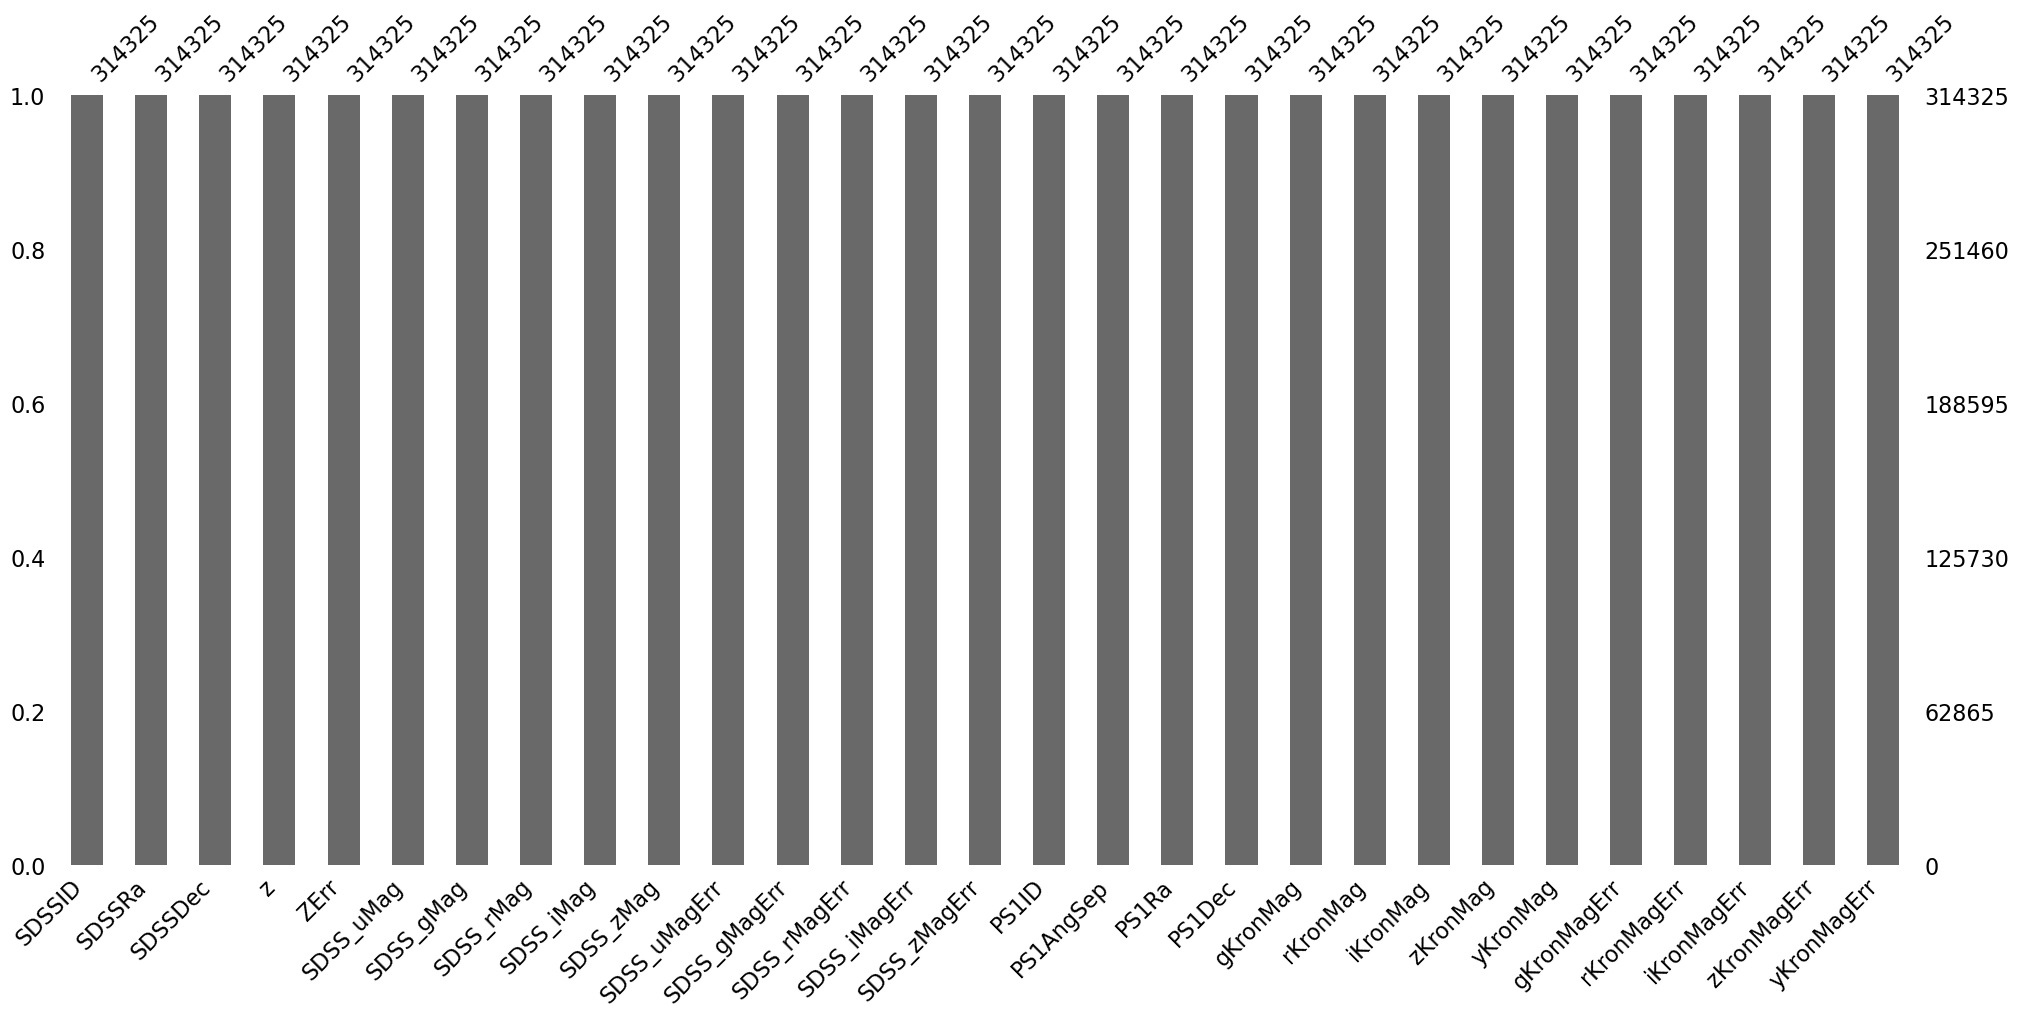

In [41]:
print(teddySDSS_PS1.isna().sum(),"\n\n")
msno.bar(teddySDSS_PS1)
plt.show()

In [42]:
teddySDSS_PS1_2M

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,TMassAngSep,TMassRa,TMassDec,j_m,h_m,k_m,j_err,h_err,k_err,TMASSID
0,1237657118941577636,117.277250,29.305172,0.102362,0.000030,20.32887,18.52176,17.60047,17.18418,16.86134,...,0.002406,117.277284,29.305199,16.873000,16.774,17.124,0.077,0.094,0.162,356631873
1,1237661948655239429,211.272440,10.315721,0.264092,0.000052,20.69785,18.86280,17.34143,16.78700,16.45400,...,0.005521,211.272377,10.315653,16.896000,16.727,16.403,0.090,0.113,0.116,976770733
2,1237666273661223281,11.693089,23.767029,0.252819,0.000038,21.38727,19.30797,17.74030,17.18118,16.83034,...,0.003024,11.693140,23.767010,17.143000,17.074,16.574,0.118,0.137,0.134,1282553713
3,1237662238022238510,228.726970,7.551574,0.177385,0.000033,20.84908,19.08652,17.84929,17.27679,16.85562,...,0.002762,228.726956,7.551618,17.326000,17.060,16.907,0.122,0.161,0.169,1034093383
4,1237669763874029810,343.006860,7.897519,0.513429,0.000063,23.01907,21.00147,19.30635,18.56060,18.17683,...,0.007305,343.006767,7.897599,18.235001,17.316,17.646,0.273,0.193,0.274,1000677531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163464,1237678845575037086,332.160620,7.777748,0.160856,0.000028,20.41659,19.20491,17.90061,17.19892,16.87377,...,0.023784,332.160567,7.777355,15.348000,15.505,15.725,0.047,0.072,0.066,996793227
163465,1237652943172665552,353.783740,14.710253,0.308009,0.000133,24.27283,21.86944,20.43418,19.61708,19.40302,...,0.033099,353.784302,14.710159,17.138001,16.878,17.136,0.098,0.111,0.151,419929429
163466,1237663479792664912,326.464230,0.514423,0.300415,0.000028,22.98600,21.38283,19.98292,19.15430,18.69812,...,0.020033,326.464471,0.514654,17.195000,17.305,17.285,0.109,0.215,0.192,1072181687
163467,1237680331095409047,339.872290,26.425648,0.070198,0.000007,20.06830,20.69494,20.22596,19.08978,19.99387,...,0.032142,339.872675,26.426058,16.625000,16.375,16.481,0.088,0.095,0.093,130270086


SDSSID              0
SDSSRa              0
SDSSDec             0
z                   0
ZErr                0
SDSS_uMag           0
SDSS_gMag           0
SDSS_rMag           0
SDSS_iMag           0
SDSS_zMag           0
SDSS_uMagErr        0
SDSS_gMagErr        0
SDSS_rMagErr        0
SDSS_iMagErr        0
SDSS_zMagErr        0
PS1ID               0
PS1AngSep           0
PS1Ra               0
PS1Dec              0
gKronMag            0
rKronMag            0
iKronMag            0
zKronMag            0
yKronMag            0
gKronMagErr         0
rKronMagErr         0
iKronMagErr         0
zKronMagErr         0
yKronMagErr         0
TMassID             0
TMassAngSep         0
TMassRa             0
TMassDec            0
j_m               357
h_m              1592
k_m                 0
j_err            6719
h_err           11892
k_err            6461
TMASSID             0
dtype: int64 




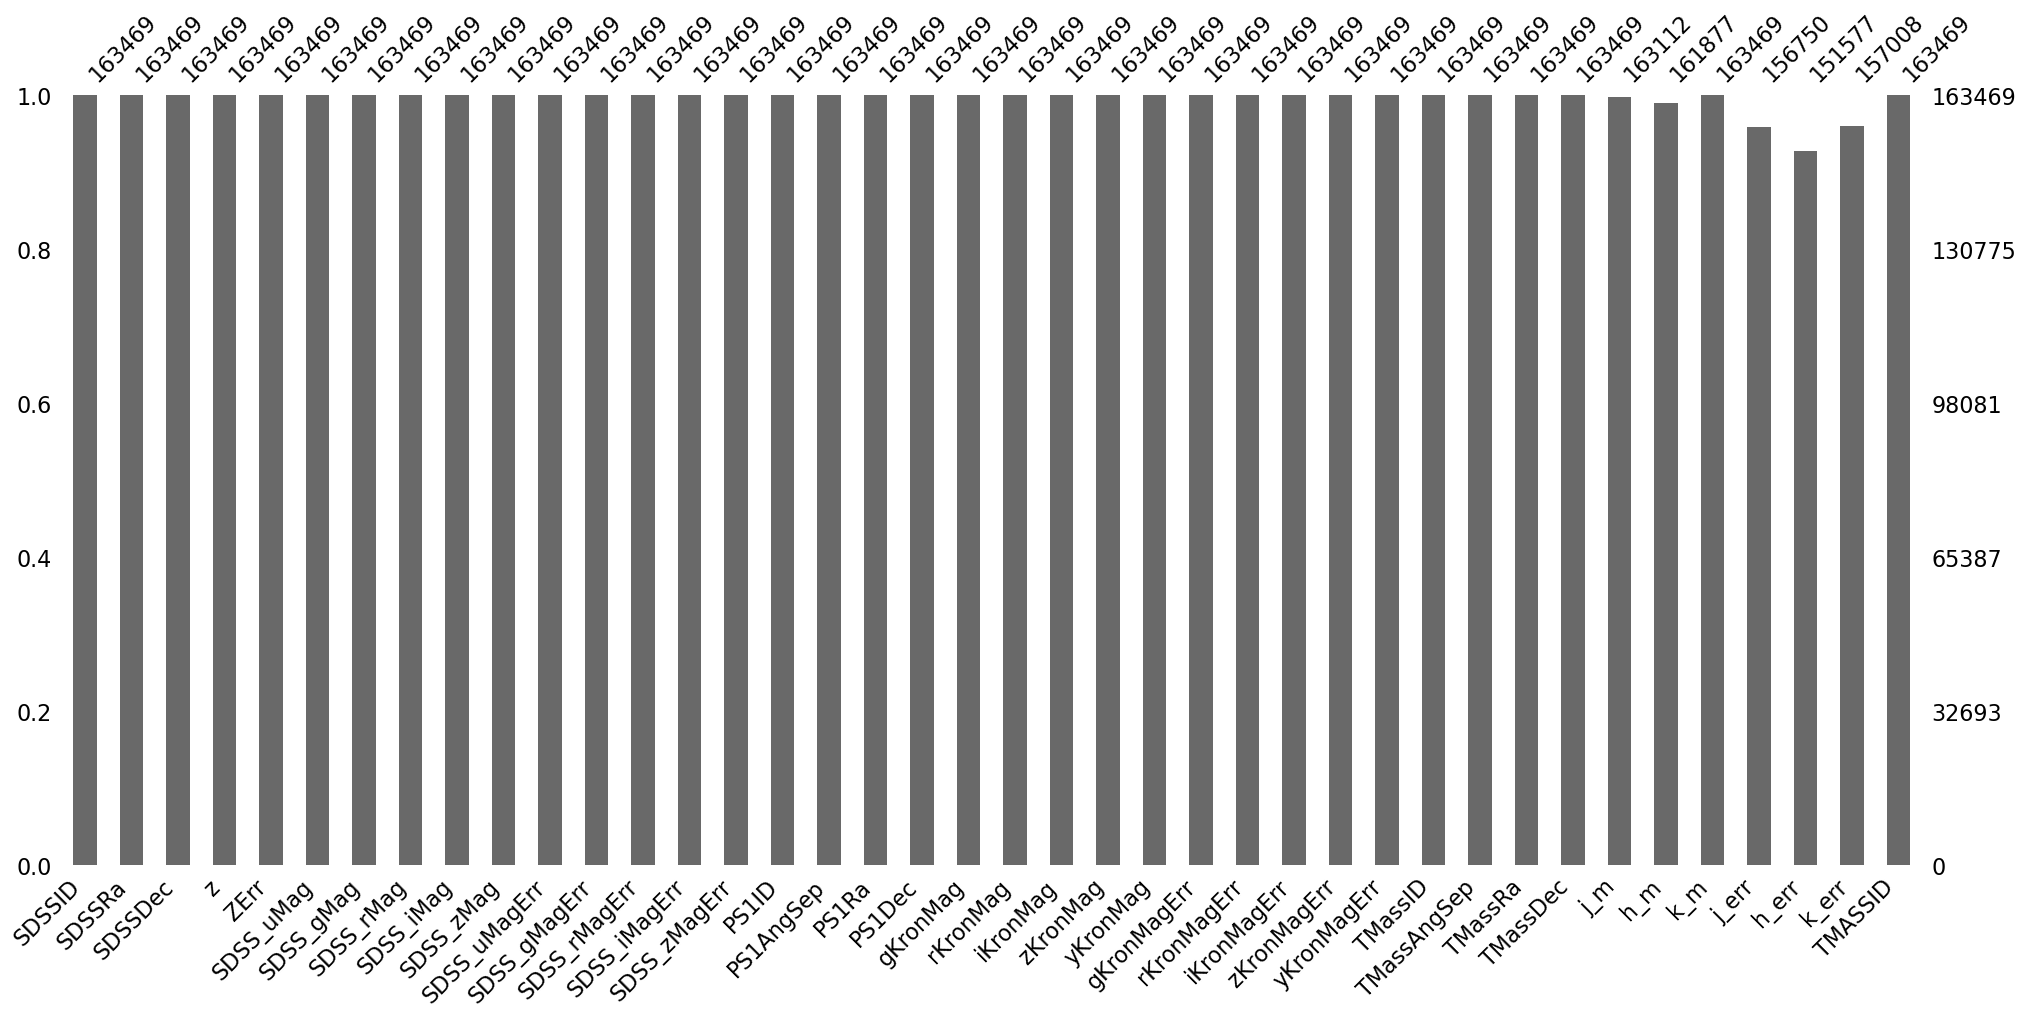

In [43]:
print(teddySDSS_PS1_2M.isna().sum(),"\n\n")
msno.bar(teddySDSS_PS1_2M)
plt.show()

In [44]:
teddySDSS_AllPS1_2M

,SDSSID,SDSSRa,SDSSDec,z,ZErr,SDSS_uMag,SDSS_gMag,SDSS_rMag,SDSS_iMag,SDSS_zMag,...,TMassAngSep,TMassRa,TMassDec,j_m,h_m,k_m,j_err,h_err,k_err,TMASSID
0,1237662266470237911,243.270350,2.994859,0.663874,0.000198,25.56275,22.83073,21.16518,19.93503,19.63537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1237657118941577636,117.277250,29.305172,0.102362,0.000030,20.32887,18.52176,17.60047,17.18418,16.86134,...,0.002406,117.277284,29.305199,16.873,16.774,17.124,0.077,0.094,0.162,356631873
2,1237661948655239429,211.272440,10.315721,0.264092,0.000052,20.69785,18.86280,17.34143,16.78700,16.45400,...,0.005521,211.272377,10.315653,16.896,16.727,16.403,0.090,0.113,0.116,976770733
3,1237666273661223281,11.693089,23.767029,0.252819,0.000038,21.38727,19.30797,17.74030,17.18118,16.83034,...,0.003024,11.693140,23.767010,17.143,17.074,16.574,0.118,0.137,0.134,1282553713
4,1237662194523767536,176.462600,42.065285,0.563699,0.000125,25.57828,22.87555,20.86299,19.83455,19.18073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314320,1237680530276221391,341.056300,28.193643,0.153329,0.000041,23.41499,22.85378,20.91858,19.91021,19.70342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314321,1237678617420104410,5.250210,1.258280,0.404736,0.000058,22.13469,21.05278,19.77937,19.28931,18.89218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314322,1237663479792664912,326.464230,0.514423,0.300415,0.000028,22.98600,21.38283,19.98292,19.15430,18.69812,...,0.020033,326.464471,0.514654,17.195,17.305,17.285,0.109,0.215,0.192,1072181687
314323,1237680331095409047,339.872290,26.425648,0.070198,0.000007,20.06830,20.69494,20.22596,19.08978,19.99387,...,0.032142,339.872675,26.426058,16.625,16.375,16.481,0.088,0.095,0.093,130270086


SDSSID               0
SDSSRa               0
SDSSDec              0
z                    0
ZErr                 0
SDSS_uMag            0
SDSS_gMag            0
SDSS_rMag            0
SDSS_iMag            0
SDSS_zMag            0
SDSS_uMagErr         0
SDSS_gMagErr         0
SDSS_rMagErr         0
SDSS_iMagErr         0
SDSS_zMagErr         0
PS1ID                0
PS1AngSep            0
PS1Ra                0
PS1Dec               0
gKronMag             0
rKronMag             0
iKronMag             0
zKronMag             0
yKronMag             0
gKronMagErr          0
rKronMagErr          0
iKronMagErr          0
zKronMagErr          0
yKronMagErr          0
TMassID         150858
TMassAngSep     150858
TMassRa         150858
TMassDec        150858
j_m             151215
h_m             152450
k_m             150858
j_err           157577
h_err           162750
k_err           157319
TMASSID         150858
dtype: int64 




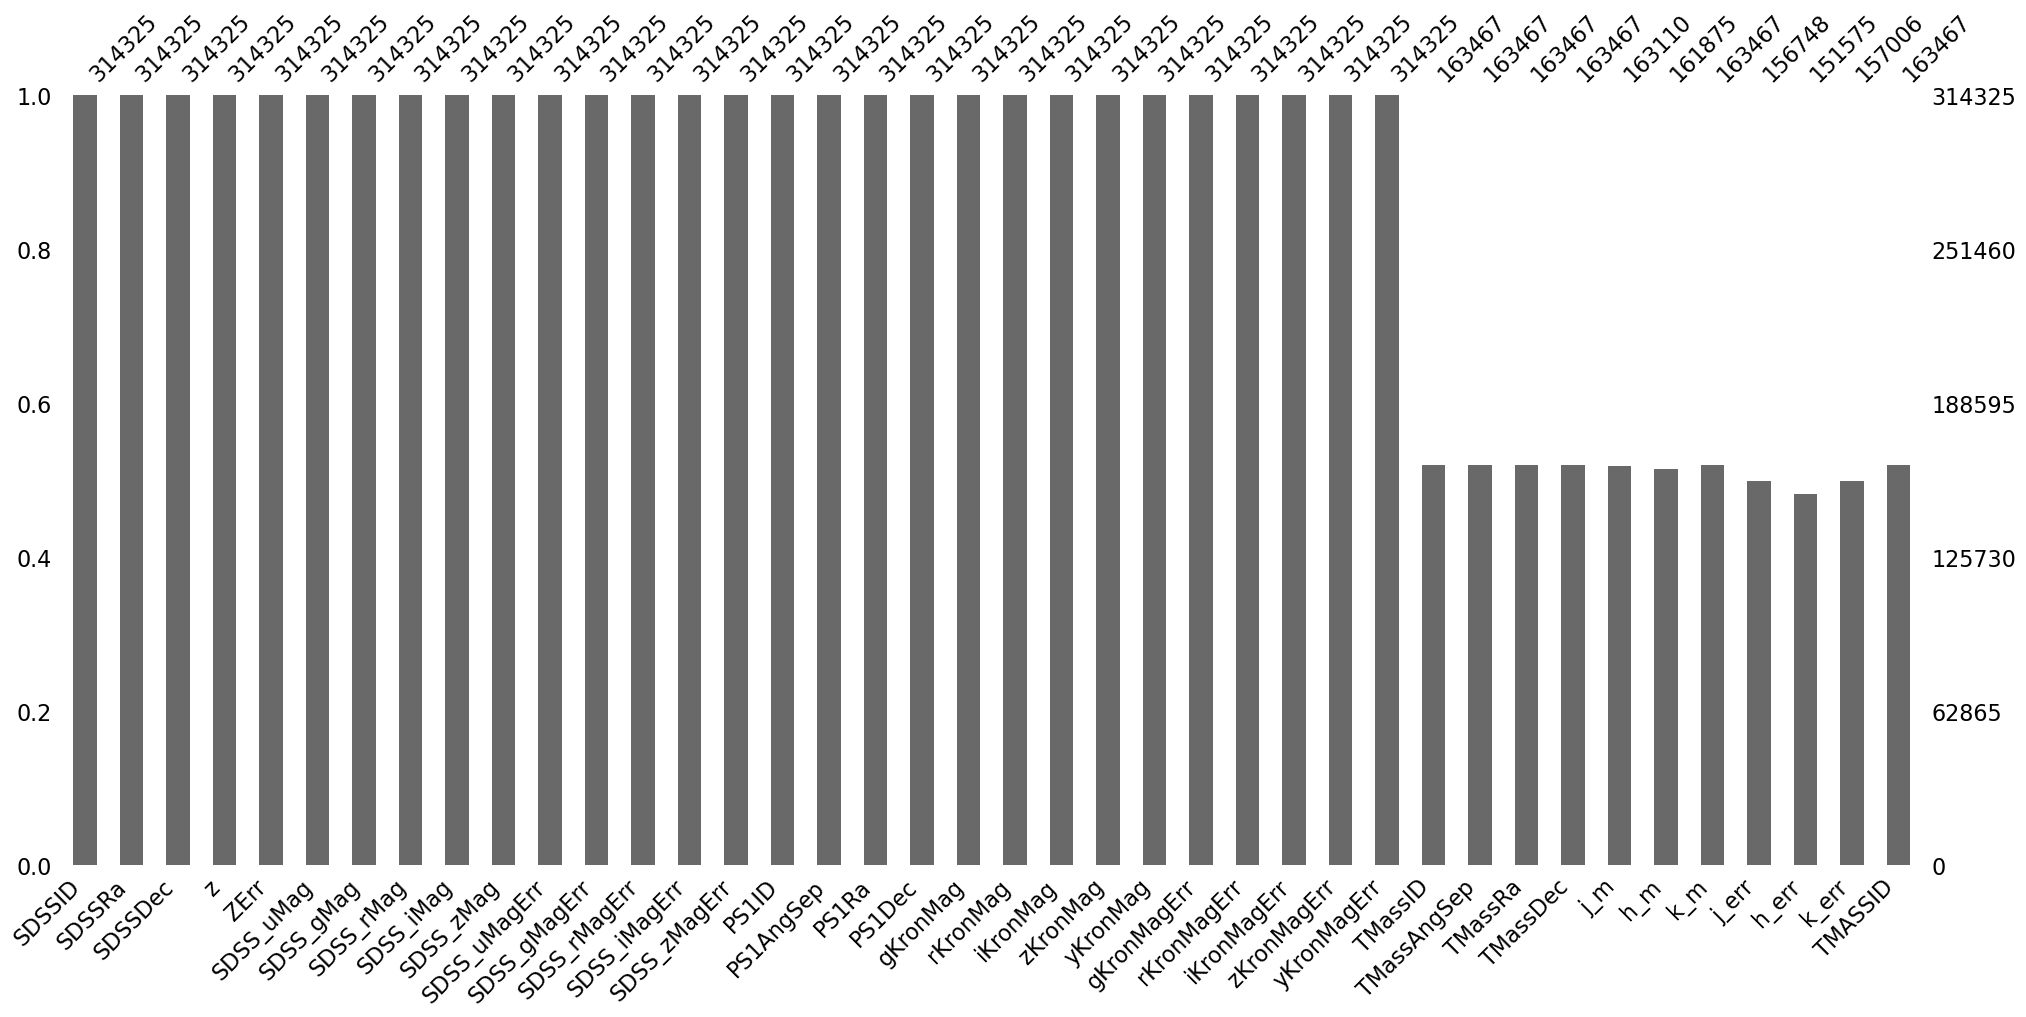

In [45]:
print(teddySDSS_AllPS1_2M.isna().sum(),"\n\n")
msno.bar(teddySDSS_AllPS1_2M)
plt.show()

# Part 4
### Downloading the required files

In [46]:
teddySDSS_AllPS1_2M.to_csv(download_path+"TEDDY_SDSS_PS1_2MASS_all_data", index=False)